Create a sale data analysis of amazone commercial store


import libraries




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [2]:
df = pd.read_csv("/content/amazon.csv")

Data Cleaning

In [3]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

Sales Performance Analysis

In [4]:
total_revenue = df['discounted_price'].sum()
avg_discount = df['discount_percentage'].mean()
highest_rated_product = df.loc[df['rating'].idxmax(), ['product_name', 'rating']]
best_selling_product = df.loc[df['rating_count'].idxmax(), ['product_name', 'rating_count']]

In [5]:
print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Average Discount: {avg_discount:.2f}%")
print(f"Highest Rated Product: {highest_rated_product}")
print(f"Best Selling Product: {best_selling_product}")

Total Revenue: ₹4,578,580.43
Average Discount: 47.69%
Highest Rated Product: product_name    Syncwire LTG to USB Cable for Fast Charging Co...
rating                                                        5.0
Name: 174, dtype: object
Best Selling Product: product_name    AmazonBasics Flexible Premium HDMI Cable (Blac...
rating_count                                             426973.0
Name: 12, dtype: object


Visualization

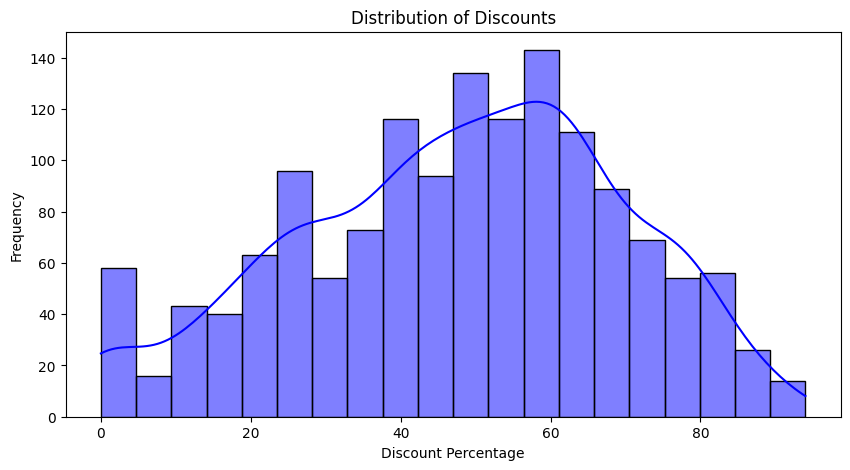

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['discount_percentage'], bins=20, kde=True, color='blue')
plt.title("Distribution of Discounts")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.show()

<ipython-input-7-9c01da87ee55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='product_name', data=top_products, palette='viridis')


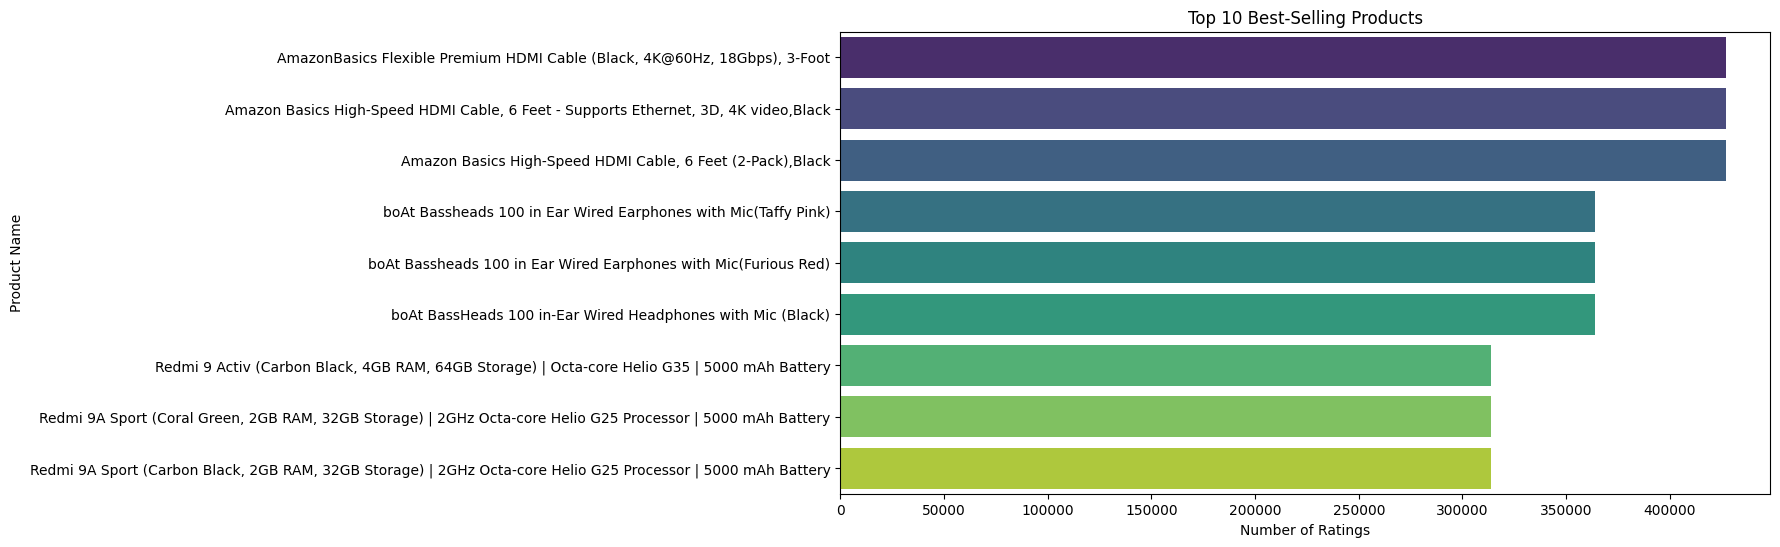

In [7]:
plt.figure(figsize=(12, 6))
top_products = df.nlargest(10, 'rating_count')
sns.barplot(x='rating_count', y='product_name', data=top_products, palette='viridis')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Number of Ratings")
plt.ylabel("Product Name")
plt.show()